In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

**Goal:** build a model to predict whether the target variable `income` of an individual is bigger or smaller than $50,000 per year **using neural networks** .

**Dataset:** https://archive.ics.uci.edu/ml/datasets/Adult from the 1994 United States Census Bureau data. 

**Features:**
- age
- workclass
- education
- education-num: _numeric representation of the education attribute._
- marital-status
- occupation
- relationship
- race
- sex
- capital-gain
- capital-loss
- hours-per-week
- native-country
- fnlwgt: _the weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly by the Population Division at the Census Bureau. 3 sets of controls are used. These are: a single cell estimate of the population 16+ for each state, conhtrols for hispanic origin by age and sex, and controls by race, age and sex._

**Read the file:**

In [2]:
df = pd.read_csv('income_dataset.csv')
df.head(20)

,age,worklass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,5
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,6
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,7
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,8
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,9


In [3]:
df.shape

(32561, 16)

**Missing values:** the character `?` is a missing value. The missing values are in the categorical features `worklass`, `occupation` and `native-country`. For the missing values I will create for each feature a new category called `unknown`. An alternative could be to build a model to predict those missing values.

In [4]:
df.replace('?', 'unkown', inplace=True)

In [5]:
df.isna().sum()

age               0
worklass          0
fnlwgt            0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
id                0
dtype: int64

**Join categories in the categorical features:**

The US school system consists of elemntary school (grade K to 5th grade), middle school (grade 6th to 8th) and high school (grade 9th to 12th) (1). 
I decided to join categories: elem-middle-school including 1st-4th, 5th-6th, 7th-8th, and high-school including 9th, 10th, 11th, 12th and HS-grad. 

1- https://www.relocatemagazine.com/articles/reeditor-09-d3-2015-7523-comparing-the-us-and-uk-education-systems. 

In [6]:
elem_middle_school = ['1st-4th','5th-6th','7th-8th']
high_school = ['9th','10th','11th','12th', 'HS-grad']

df['education'].replace(to_replace = elem_middle_school, value = 'Elem_middle_school',inplace = True)
df['education'].replace(to_replace = high_school,value = 'High_school',inplace = True)

In [7]:
df['education'].value_counts()

High_school           13556
Some-college           7291
Bachelors              5355
Masters                1723
Assoc-voc              1382
Elem_middle_school     1147
Assoc-acdm             1067
Prof-school             576
Doctorate               413
Preschool                51
Name: education, dtype: int64

In `worklass` feature I will create a category called `No_pay` joining the categories `Without-pay` and `Never-worked` because there are few records for each category and I consider them similar. 

In [8]:
no_pay = ['Without-pay','Never-worked']

df['worklass'].replace(to_replace = no_pay, value = 'No_pay', inplace = True)

In [9]:
df['worklass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unkown               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
No_pay                 21
Name: worklass, dtype: int64

**Drop columns:** for the rest of the analysis I will drop the columns `id` and `education-num`. In the case of `education-num` I remove it because it won't contain the same categories as `education` after joining categiries.

In [10]:
df.drop(columns=['education-num', 'id'], inplace=True)

In [11]:
df.head()

,age,worklass,fnlwgt,education,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High_school,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High_school,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Encode categorical features with `get_dummies`:**

In [12]:
df_encoded = pd.get_dummies(df, 
                            columns=['worklass', 'education','martial-status', 'occupation', 'relationship', 
                                     'race', 'sex','native-country', 'income'], 
                            prefix_sep='_',
                            drop_first=True)

In [13]:
df_encoded.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,worklass_Local-gov,worklass_No_pay,worklass_Private,worklass_Self-emp-inc,worklass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unkown,income_>50K
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,83311,0,0,13,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,38,215646,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# check the new columns after get_dummies:
df_encoded.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'worklass_Local-gov', 'worklass_No_pay', 'worklass_Private',
       'worklass_Self-emp-inc', 'worklass_Self-emp-not-inc',
       'worklass_State-gov', 'worklass_unkown', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate',
       'education_Elem_middle_school', 'education_High_school',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'martial-status_Married-AF-spouse',
       'martial-status_Married-civ-spouse',
       'martial-status_Married-spouse-absent', 'martial-status_Never-married',
       'martial-status_Separated', 'martial-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupati

**Scale the numerical continous variables before training the neural network:**

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) 
df_encoded[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(df_encoded[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [16]:
df_encoded.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,worklass_Local-gov,worklass_No_pay,worklass_Private,worklass_Self-emp-inc,worklass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unkown,income_>50K
0,0.301370,0.044302,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.452055,0.048238,0.00000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.287671,0.138113,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.493151,0.151068,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.150685,0.221488,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Train the algorithm:**

In [17]:
X = df_encoded.iloc[:,:-1].values
y = df_encoded['income_>50K'].values

In [18]:
# split the dataset in train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
X.shape

(32561, 92)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(92,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['acc'])

The classes are imbalanced so to account for this:

In [21]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [22]:
epochs = 20
batch_size = 128
es = EarlyStopping(monitor='val_loss', mode='min')

history = model.fit(X_train, y_train,
                    class_weight=class_weights,
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[es])

Train on 19536 samples, validate on 4884 samples
Epoch 1/20
19536/19536 [==============================] - 1s 45us/sample - loss: 0.4521 - acc: 0.7853 - val_loss: 0.3714 - val_acc: 0.8266
Epoch 2/20
19536/19536 [==============================] - 0s 12us/sample - loss: 0.3627 - acc: 0.8323 - val_loss: 0.3528 - val_acc: 0.8321
Epoch 3/20
19536/19536 [==============================] - 0s 11us/sample - loss: 0.3535 - acc: 0.8347 - val_loss: 0.3453 - val_acc: 0.8335
Epoch 4/20
19536/19536 [==============================] - 0s 11us/sample - loss: 0.3481 - acc: 0.8377 - val_loss: 0.3403 - val_acc: 0.8389
Epoch 5/20
19536/19536 [==============================] - 0s 11us/sample - loss: 0.3440 - acc: 0.8392 - val_loss: 0.3352 - val_acc: 0.8403
Epoch 6/20
19536/19536 [==============================] - 0s 11us/sample - loss: 0.3402 - acc: 0.8401 - val_loss: 0.3323 - val_acc: 0.8421
Epoch 7/20
19536/19536 [==============================] - 0s 11us/sample - loss: 0.3371 - acc: 0.8424 - val_loss: 0.3

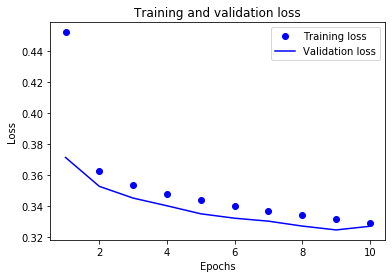

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend();

In [24]:
model.evaluate(X_test, y_test)

8141/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32665257605986814, 0.84879005]

In [25]:
y_pred = model.predict_classes(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6214
           1       0.76      0.53      0.63      1927

    accuracy                           0.85      8141
   macro avg       0.81      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7402009941560221

Accuracy is not the best performance measure for classification when dealing with skewed datasets (some classes are much more frequent than others). 

If classes are imbalanced, a classifier might classify all the observations as belonging to the majority class. The overall accuracy would be very high, but in more detail the classifier would have a 100% recognition rate for the majority class but a 0% recognition rate for the minority class.

In this case, I would prefer to have less false positives (predict as high income when it is not) that would result in a higher precision score. Precision is the metric I would choose as performance measure.

**Precision**: accuracy of the positive predictions

$Precision = \frac{TP}{TP+FP}$

---